In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [2]:
class Ising():
    
    def __init__(self, size, temperature):
        self.size = size
        self.t = temperature
        
    def initialize(self):
        self.config = np.random.choice([-1, 1], (self.size, self.size))
        
    def draw(self):
        plt.imshow(self.config, cmap='viridis', interpolation='nearest')
    
    def update(self):
        i = np.random.choice(range(self.size))
        j = np.random.choice(range(self.size))
        
        energy = - self.config[i, j] * (self.config[(i+1)%self.size, j] + self.config[i-1, j] + self.config[i, (j+1)%self.size] + self.config[i, j-1])
        
        if random.random() < min(1, math.e**(2*energy/self.t)):
            self.config[i, j] = self.config[i, j]*(-1)
    
    def avg_magnet(self):
        return np.sum(self.config)/(self.size**2)
    
    def simulate(self, steps):
        for i in range(steps):
            self.update()

0.0036


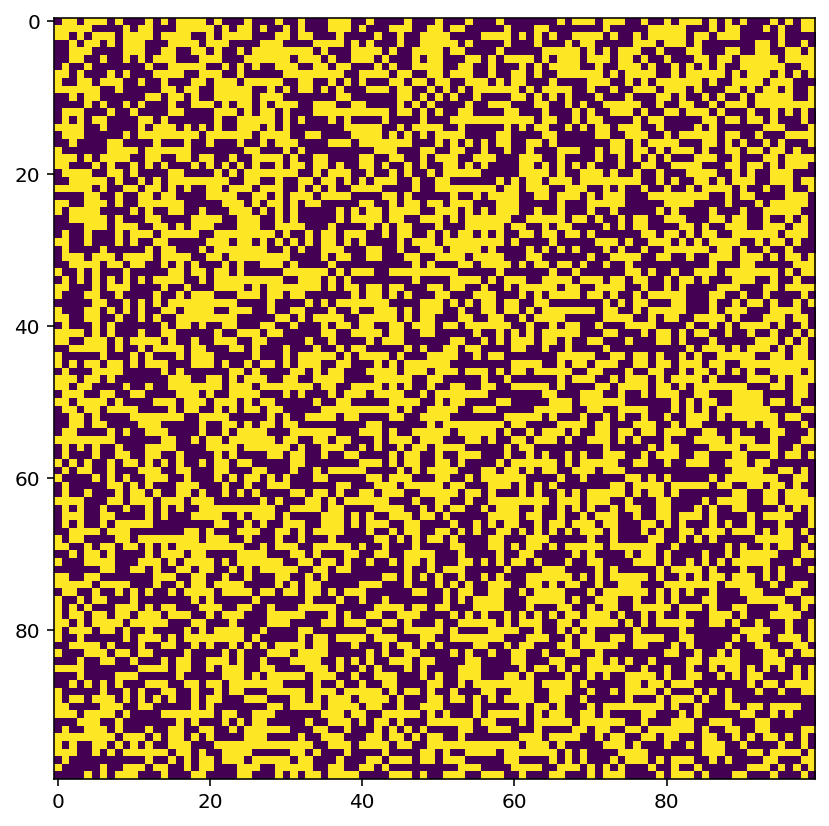

In [3]:
sample = Ising(100, 3)
sample.initialize()
sample.draw()
print(sample.avg_magnet())

0.0038


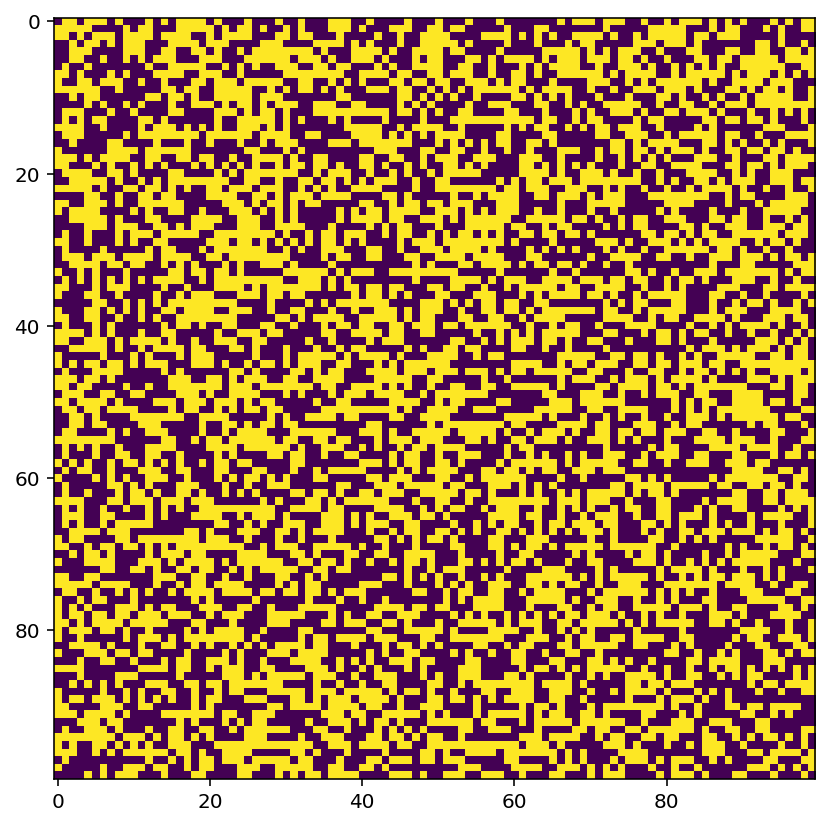

In [4]:
sample.update()
sample.draw()
print(sample.avg_magnet())

In [5]:
#Cocalc crushes when I run the simulation with 100,000 steps

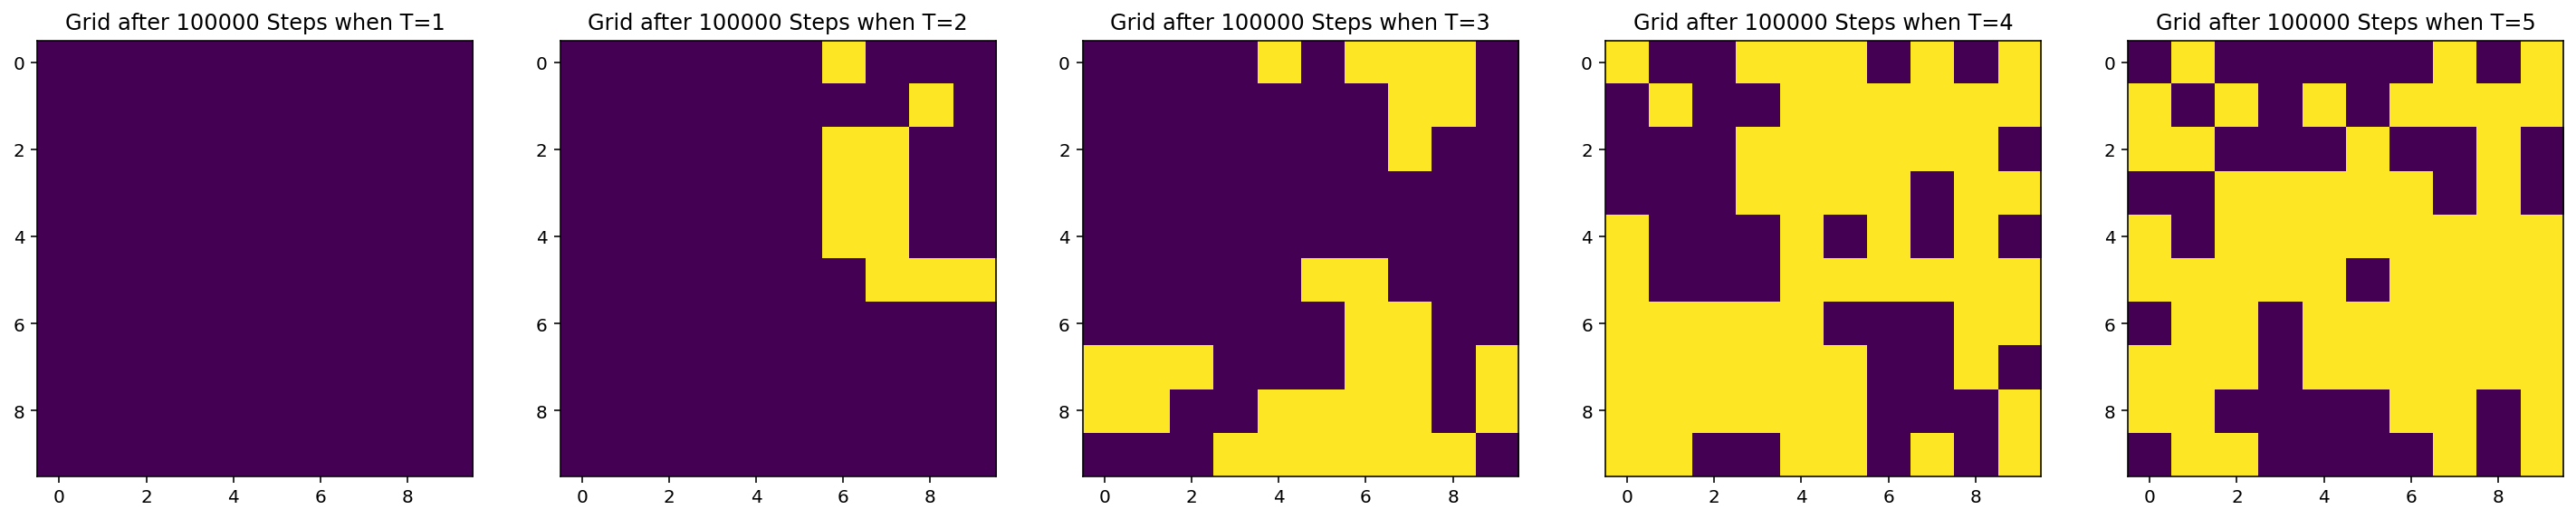

In [6]:
temperatures = [1, 2, 3, 4, 5]
temp_data = [[], [], [], [], []]


plt.figure(figsize=(25, 5))

for temperature in temperatures:
    
    for i in range(100):
        sim = Ising(10, temperature)
        sim.initialize()
        sim.simulate(10000)
        
        temp_data[temperature-1].append(sim.avg_magnet())
        
        if i == 0:
            plt.subplot(1, 5, temperature)
            sim.draw()
            plt.title('Grid after 100000 Steps when T=%d' % temperature)

plt.show()

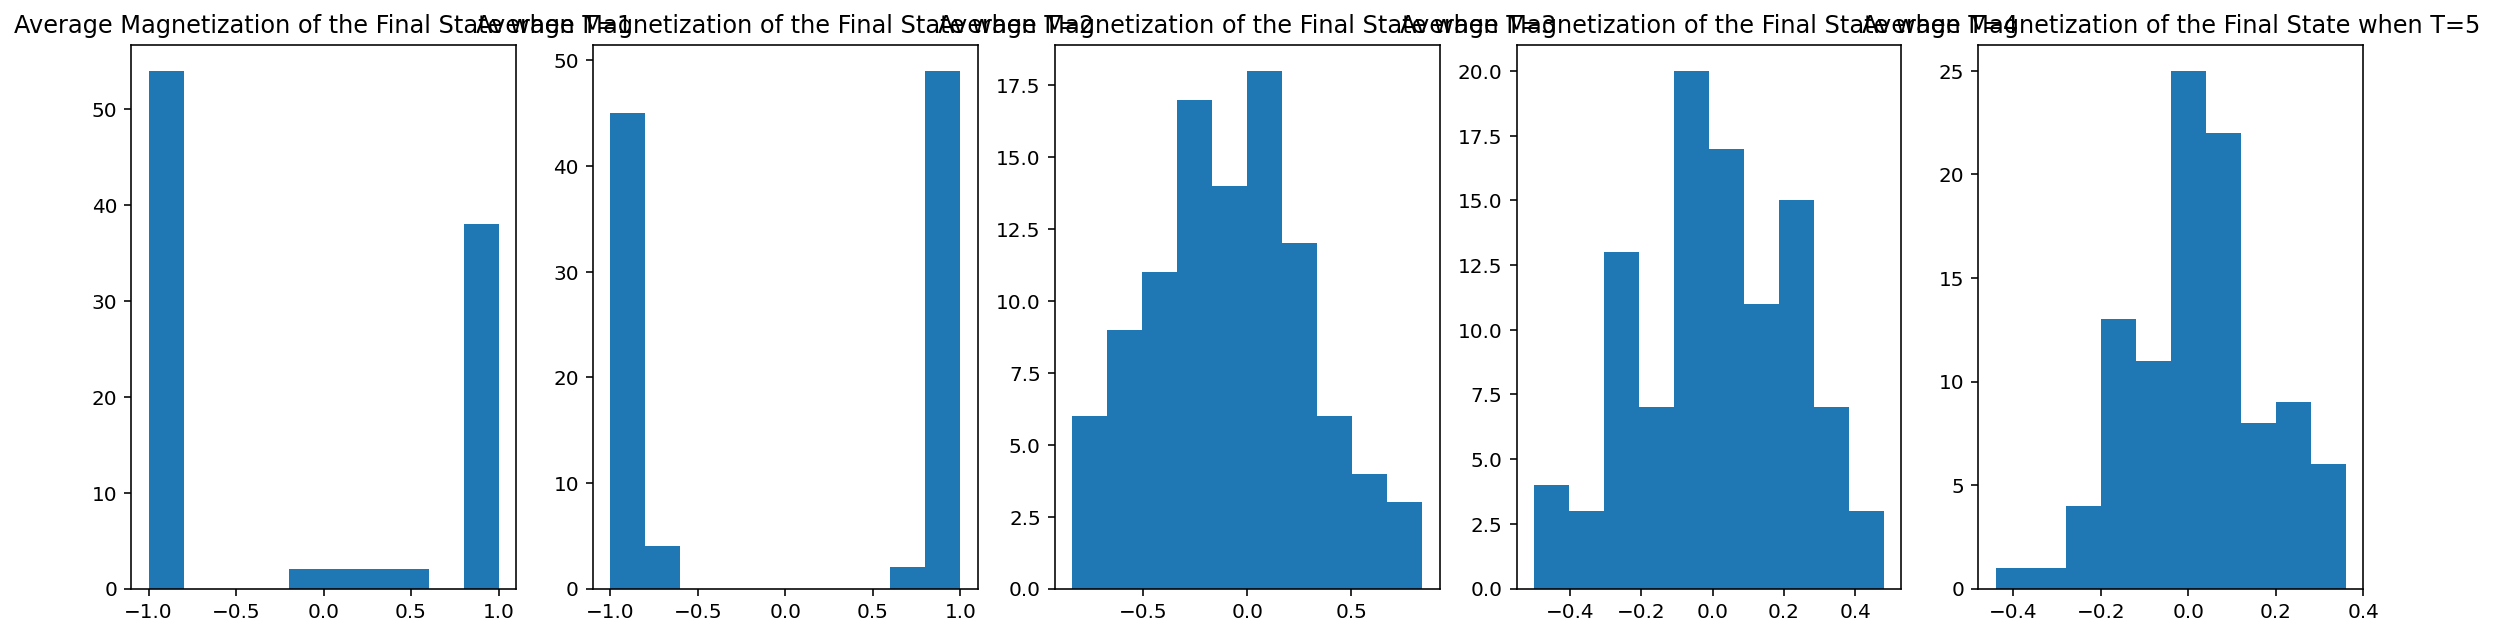

In [7]:
plt.figure(figsize=(20, 5))

for temperature in temperatures:    
    plt.subplot(1, 5, temperature)
    plt.hist(temp_data[temperature-1])
    plt.title('Average Magnetization of the Final State when T=%d' % temperature)
    
plt.show()